In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, t, chi2, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###########
# Задача 1#
###########

data_A = np.array([6, 9, 8, 9, 7, 10, 9, 11, 10, 12])

# Вычисление выборочного среднего и стандартного отклонения
mean_x = np.mean(data_A)
std_x = np.std(data_A, ddof=1)
n = len(data_A)

# 1. Определяем доверительную вероятность для e = 1
e1 = 1
t_value_1 = e1 * np.sqrt(n) / std_x
p_value = 2 * (1 - stats.t.cdf(t_value_1, df=n-1))

# 2. Определяем необходимое число измерений для e = 0.5, P = 0.99
e2 = 0.5
t_value_2 = stats.t.ppf(0.995, df=n-1)  # t-критическое для 99% доверительного уровня
n_required = (t_value_2 * std_x / e2) ** 2

print(f"Доверительная вероятность для e = 1: {p_value:.3f}")
print(f"Необходимое число измерений для e = 0.5 и P = 0.99: {int(np.ceil(n_required))}")

Доверительная вероятность для e = 1: 0.111
Необходимое число измерений для e = 0.5 и P = 0.99: 136


Среднее: 109.69
Выборочная дисперсия: 58.88
Среднеквадратическое отклонение: 7.67
Размах: 30, Минимум: 93, Максимум: 123
Доверительный интервал (95.0%): (np.float64(108.16740950583912), np.float64(111.21259049416088))
Доверительный интервал (99.0%): (np.float64(107.674625632783), np.float64(111.70537436721699))
Доверительный интервал (99.9%): (np.float64(107.08750758684641), np.float64(112.29249241315358))


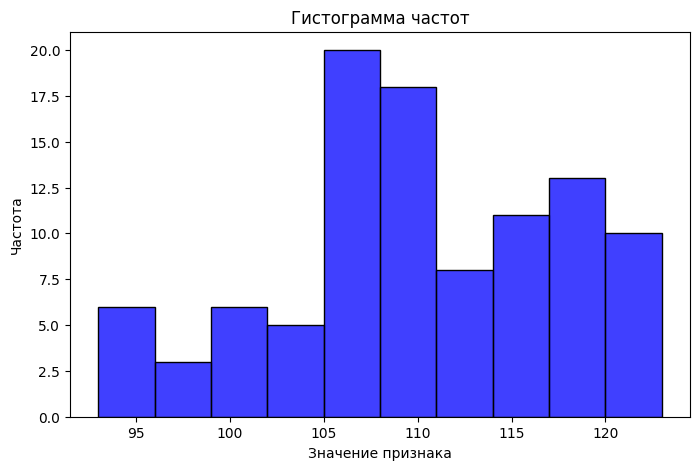

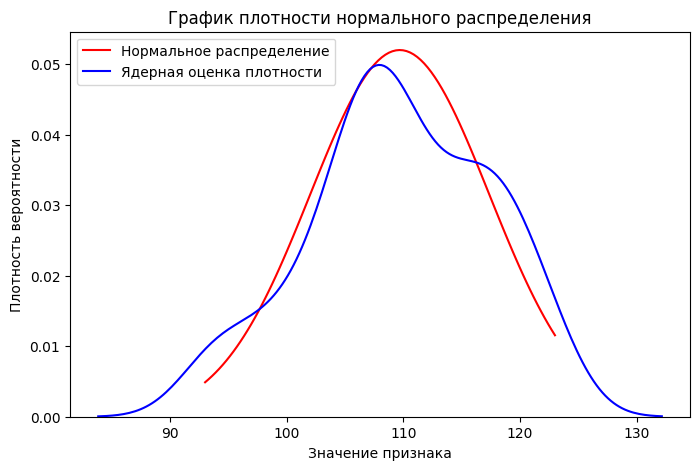

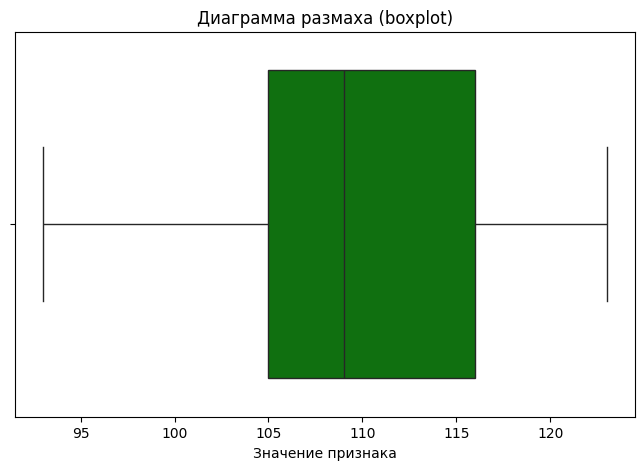

Критерий Пирсона χ²: 24.89, p-value: 0.0031


In [3]:
###########
# Задача 2#
###########

# Входные данные (100 значений)
data_B = np.array([
    106, 113, 120, 93, 106, 119, 109, 106, 98, 93,
    105, 108, 118, 122, 105, 118, 108, 105, 108, 105,
    101, 113, 107, 114, 115, 118, 111, 110, 117, 111,
    102, 107, 99, 113, 96, 108, 104, 107, 100, 105,
    109, 114, 100, 110, 117, 109, 117, 94, 116, 107,
    110, 95, 122, 122, 115, 102, 116, 119, 116, 118,
    115, 118, 106, 103, 116, 110, 109, 121, 123, 97,
    113, 110, 119, 107, 93, 104, 115, 101, 121, 111,
    107, 123, 109, 120, 100, 111, 110, 109, 106, 119,
    105, 110, 123, 106, 95, 107, 105, 118, 114, 109
])

# 1. Вычисление статистик
mean_sample = np.mean(data_B)
var_sample = np.var(data_B, ddof=1)
std_sample = np.std(data_B, ddof=1)
range_data = np.ptp(data_B)
min_value = np.min(data_B)
max_value = np.max(data_B)

print(f"Среднее: {mean_sample:.2f}")
print(f"Выборочная дисперсия: {var_sample:.2f}")
print(f"Среднеквадратическое отклонение: {std_sample:.2f}")
print(f"Размах: {range_data}, Минимум: {min_value}, Максимум: {max_value}")

# 2. Доверительные интервалы
confidence_levels = [0.95, 0.99, 0.999]
n = len(data_B)
intervals = {}
for confidence in confidence_levels:
    alpha = 1 - confidence
    t_critical = t.ppf(1 - alpha / 2, df=n - 1)
    margin_of_error = t_critical * std_sample / np.sqrt(n)
    intervals[confidence] = (mean_sample - margin_of_error, mean_sample + margin_of_error)
    print(f"Доверительный интервал ({confidence*100}%): {intervals[confidence]}")

# 3. Гистограмма частот
plt.figure(figsize=(8, 5))
sns.histplot(data_B, bins=10, kde=False, color="blue", edgecolor="black")
plt.xlabel("Значение признака")
plt.ylabel("Частота")
plt.title("Гистограмма частот")
plt.show()

# 4. График плотности нормального распределения
x = np.linspace(min_value, max_value, 100)
pdf = norm.pdf(x, mean_sample, std_sample)
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Нормальное распределение", color="red")
sns.kdeplot(data_B, label="Ядерная оценка плотности", color="blue")
plt.xlabel("Значение признака")
plt.ylabel("Плотность вероятности")
plt.title("График плотности нормального распределения")
plt.legend()
plt.show()

# 5. Диаграмма размаха (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_B, color="green")
plt.xlabel("Значение признака")
plt.title("Диаграмма размаха (boxplot)")
plt.show()

# 6. Критерий Пирсона χ²
num_bins = int(np.sqrt(n))
hist, bin_edges = np.histogram(data_B, bins=num_bins)
expected_freqs = norm.cdf(bin_edges[1:], mean_sample, std_sample) - norm.cdf(bin_edges[:-1], mean_sample, std_sample)
expected_freqs *= n
chi2_stat = np.sum((hist - expected_freqs) ** 2 / expected_freqs)
p_value = 1 - chi2.cdf(chi2_stat, df=num_bins - 1)
print(f"Критерий Пирсона χ²: {chi2_stat:.2f}, p-value: {p_value:.4f}")

Статистика критерия Колмогорова-Смирнова: 0.4073
p-value: 0.0000
Гипотеза о равенстве распределений отвергается (p <= 0.05)


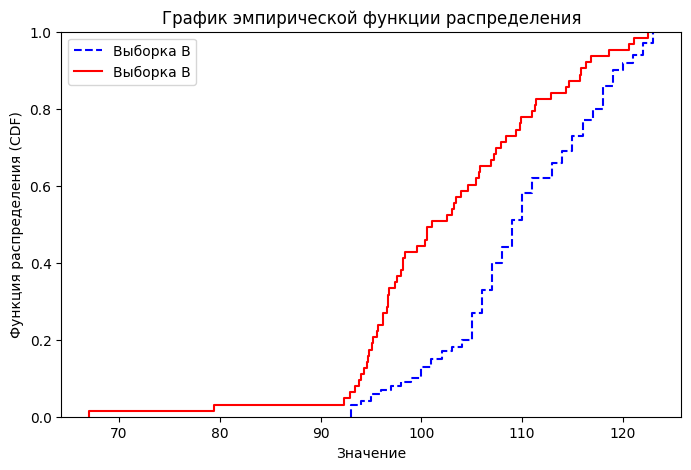

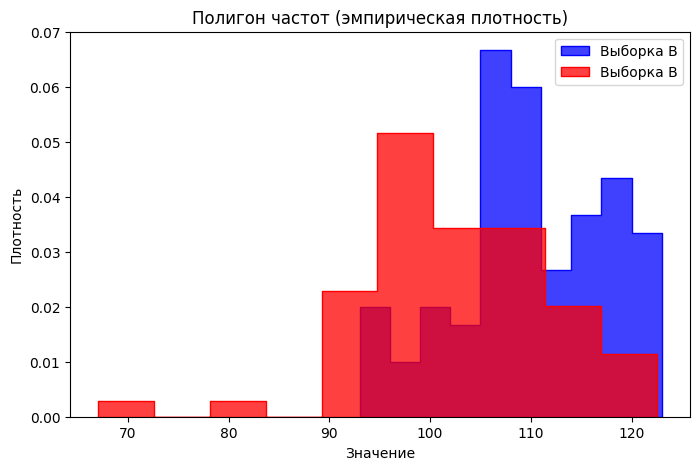

In [4]:
###########
# Задача 3#
###########

# Выборка В (новые данные)
data_V = np.array([
    116.83, 97.60, 114.69, 118.59, 100.38, 112.86, 102.52, 92.31, 96.24,
    103.40, 111.28, 120.62, 109.79, 95.63, 111.36, 101.06, 92.87, 96.80,
    96.23, 104.62, 96.63, 79.39, 94.78, 109.87, 99.60, 93.43, 97.37,
    109.36, 121.10, 115.78, 98.19, 98.38, 108.38, 98.14, 93.99, 100.54,
    122.48, 107.18, 97.99, 94.26, 107.88, 106.89, 96.68, 94.56, 100.57,
    103.06, 116.36, 94.74, 96.65, 115.84, 105.43, 95.23, 95.12, 103.22,
    105.72, 110.96, 107.38, 67.06, 114.35, 103.97, 93.77, 95.68, 105.86
])

# 1. Критерий Колмогорова-Смирнова
ks_stat, p_value = ks_2samp(data_B, data_V)
print(f"Статистика критерия Колмогорова-Смирнова: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Нет оснований отвергать гипотезу о равенстве распределений (p > 0.05)")
else:
    print("Гипотеза о равенстве распределений отвергается (p <= 0.05)")

# 2. График распределения (CDF)
plt.figure(figsize=(8, 5))
sns.ecdfplot(data_B, label="Выборка B", linestyle="--", color="blue")
sns.ecdfplot(data_V, label="Выборка В", linestyle="-", color="red")
plt.xlabel("Значение")
plt.ylabel("Функция распределения (CDF)")
plt.title("График эмпирической функции распределения")
plt.legend()
plt.show()

# 3. Полигон частот
plt.figure(figsize=(8, 5))
sns.histplot(data_B, bins=10, kde=False, stat="density", label="Выборка B", color="blue", element="step")
sns.histplot(data_V, bins=10, kde=False, stat="density", label="Выборка В", color="red", element="step")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.title("Полигон частот (эмпирическая плотность)")
plt.legend()
plt.show()